## Comparing rolling sum of percentage change - OBX, NO-equties
### Reading data 

In [129]:
def eqt_OSEBX_rolling_df(osebx_ret: pd.Series,
                         eqt_name: str,
                         window_size: int,
                         start_year: str = '2013',
                         zscores: bool = True):
    """Generates a df of a window_size-day rolling sum of pct change"""
    
    equities_obx_rolling_sum = equities_obx_returns.rolling(window_size)\
                                                   .sum()[window_size:]
    
    eqt_rolling_sum = equities_obx_rolling_sum[[eqt_name]]
    OSEBX_rolling_sum = osebx_ret.rolling(window_size).sum()[window_size:]
    
    df_ = pd.concat([eqt_rolling_sum, OSEBX_rolling_sum], axis=1)[1:]
    df_z = (df_ - df_.mean()) / df_.std()
    
    if zscores:
        return df_z[start_year:]
    else:
        return df_[start_year:]
    

<IPython.core.display.Javascript object>

In [27]:
window = 10

#### Equities Norway

In [67]:
equities_obx = pd.read_excel('EQUITIES.xlsx', sheet_name='Norway', index_col='Name')
equities_obx.index = pd.to_datetime(equities_obx.index)
equities_obx_returns = equities_obx.pct_change()[1:] 
equities_obx_returns.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,EQUINOR,DNB BANK,TELENOR,NORSK HYDRO,AKER BP,MOWI,YARA INTERNATIONAL,AKER,DNO,GJENSIDIGE FORSIKRING,...,LEROY SEAFOOD GROUP,NEL,NORDIC SEMICONDUCTOR,NORWAY ROYAL SALMON,NORWEGIAN AIR SHUTTLE,PROTECTOR FORSIKRING,STOREBRAND,SUBSEA 7,VEIDEKKE,WALLENIUS WILHELMSEN
Name,,,,,,,,,,,,,,,,,,,,,
2013-01-03,-0.000710,0.000000,0.006184,0.005877,0.003527,-0.005650,0.003974,0.009167,-0.002077,0.000000,...,0.000000,-0.008065,-0.012739,0.017058,0.019052,0.033502,0.008995,-0.002940,-0.008949,-0.004955
2013-01-04,0.003521,0.013891,0.006146,-0.009969,-0.023819,-0.011364,-0.001434,-0.002276,0.004163,-0.007329,...,0.029847,-0.008130,0.032260,0.000000,0.018070,-0.007185,0.026725,0.014741,0.004514,0.009918
2013-01-07,-0.008433,0.000000,-0.002622,-0.008681,0.000000,-0.014368,-0.011892,0.000000,-0.012956,-0.004922,...,0.000000,0.016393,0.006246,0.053809,-0.008576,0.000000,-0.006932,-0.014527,0.002248,0.000000
2013-01-08,-0.000714,0.002052,0.005257,-0.003152,0.003000,0.002915,0.010203,0.000000,0.021527,0.009258,...,0.014499,0.032258,0.006211,0.000000,0.005566,0.007237,0.003490,-0.000727,0.002243,0.014710
2013-01-09,0.008540,0.000686,0.008682,0.004568,-0.005384,0.011628,0.014086,-0.004543,-0.009252,-0.001194,...,-0.010715,0.000000,0.006173,0.000000,-0.017804,0.007185,0.001739,0.002950,0.002236,0.014497


<AxesSubplot:xlabel='Name'>

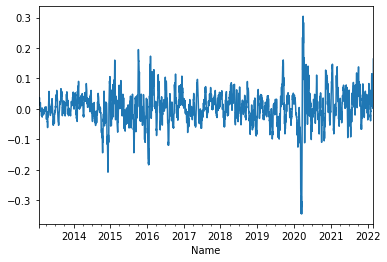

In [68]:
equities_obx_rolling_sum = equities_obx_returns.rolling(window).sum()[10:]
equities_obx_rolling_sum['EQUINOR'].plot()

#### OSEBX

In [76]:
indices = pd.read_excel('MASTER_A.xlsx',
                       sheet_name = 'Indices',
                       index_col  = 'Date',
                       skiprows   = 1)
OSEBX = indices[['OSEBX']]['2013':]
OSEBX_returns = OSEBX.pct_change()[1:]
OSEBX_returns.head()

<IPython.core.display.Javascript object>

,OSEBX
Date,
2013-01-02,0.023441
2013-01-03,0.001672
2013-01-04,0.003756
2013-01-07,-0.006259
2013-01-08,0.004250


<AxesSubplot:xlabel='Date'>

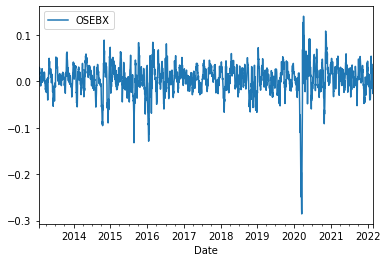

In [77]:
OSEBX_rolling_sum = OSEBX_returns.rolling(window).sum()[10:]
OSEBX_rolling_sum.plot()

## Case studies

#### Equinor

<IPython.core.display.Javascript object>

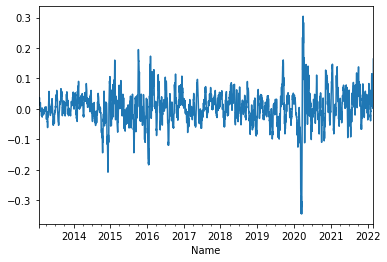

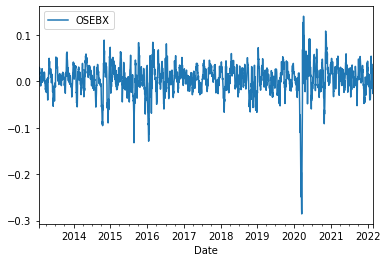

In [78]:
equinor_rolling_10 = equities_obx_rolling_sum['EQUINOR']

equinor_rolling_10.plot()
OSEBX_rolling_sum.plot()
plt.show()

In [79]:
print(equinor_rolling_10.mean())
print(OSEBX_rolling_sum.mean())

0.006179915156958286
OSEBX    0.00456
dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

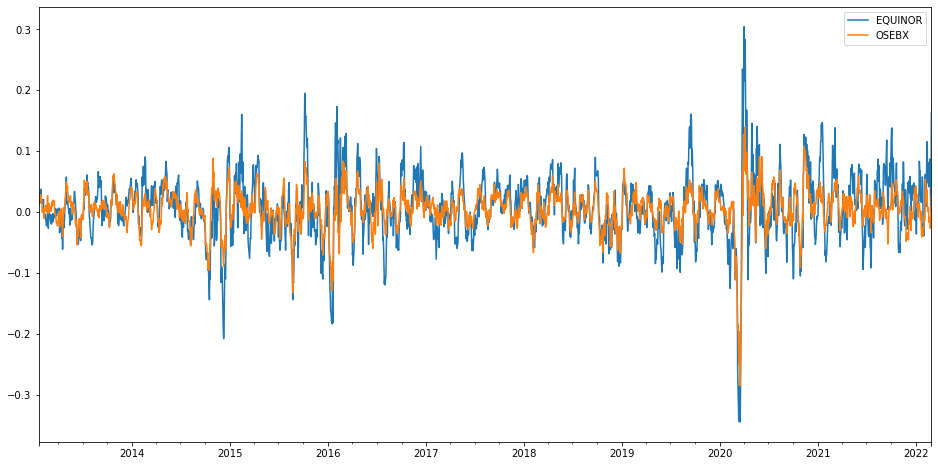

In [86]:
df = pd.concat([equinor_rolling_10, OSEBX_rolling_sum], axis=1)[1:]
df.plot(figsize=(16,8))
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

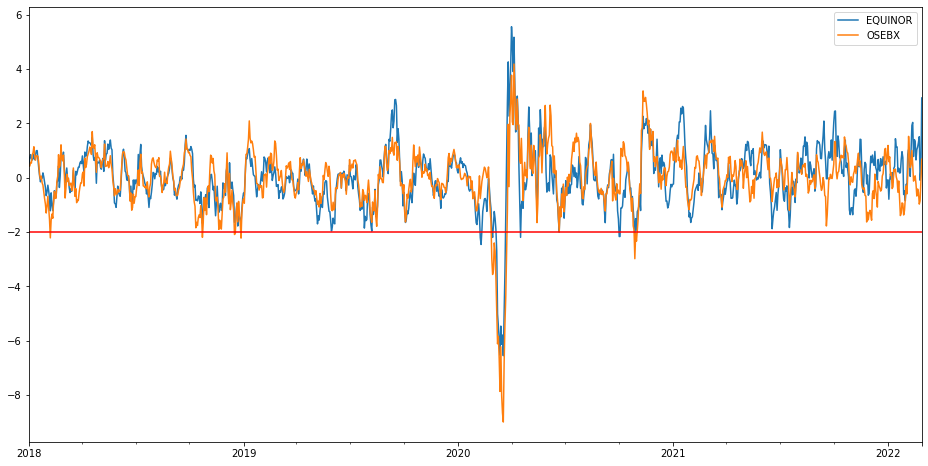

In [98]:
df_z = (df - df.mean()) / df.std()
df_z['2018':].plot(figsize=(16,8))
plt.axhline(y=-2, c='red')
plt.show()

### Using functionality

In [104]:
eqt_names = equities_obx.columns
eqt_names

Index(['EQUINOR', 'DNB BANK', 'TELENOR', 'NORSK HYDRO', 'AKER BP', 'MOWI',
       'YARA INTERNATIONAL', 'AKER', 'DNO', 'GJENSIDIGE FORSIKRING',
       'GRIEG SEAFOOD', 'ORKLA', 'SALMAR', 'SCHIBSTED A', 'TOMRA SYSTEMS',
       'AF GRUPPEN 'A'', 'ARENDALS FOSSEKOMPANI', 'ATEA', 'AUSTEVOLL SEAFOOD',
       'BAKKAFROST', 'BONHEUR', 'BORREGAARD', 'EIENDOMSSPAR', 'FRONTLINE',
       'GOLAR LNG (NAS)', 'KONGSBERG GRUPPEN', 'LEROY SEAFOOD GROUP', 'NEL',
       'NORDIC SEMICONDUCTOR', 'NORWAY ROYAL SALMON', 'NORWEGIAN AIR SHUTTLE',
       'PROTECTOR FORSIKRING', 'STOREBRAND', 'SUBSEA 7', 'VEIDEKKE',
       'WALLENIUS WILHELMSEN'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

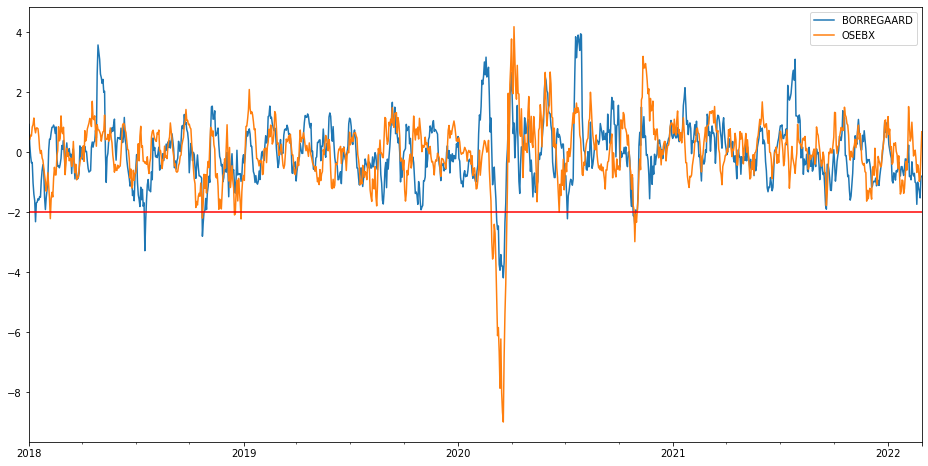

In [132]:
plt.figure()
df_z = eqt_OSEBX_rolling_df(OSEBX_returns, 'BORREGAARD', 10, zscores=True, start_year='2018')
df_z.plot(figsize=(16,8))
plt.axhline(-2, c='r')
plt.show()